# 1. Receptive field and parameter count (1 point)

Recall that the *receptive field* refers to size of the region in the input that are visible to a given activation (or neuron) in a convolutional neural network. "Visible" here means that the values of those inputs affect the value of the activation. In all of the following questions, assume that the input image is arbitrarily large, so you don't need to worry about boundary effects or padding.

1. Consider a convolutional network which consists of three convolutional layers, each with a filter size of 3x3, and a stride of 1x1. What is the receptive field size of one of the activations at the final output?

**Solution:**

Each activation in a given layer depends on a rectangular region of the layer input, whose size is determined by the receptive field of the previous layer.

In this case, the receptive field size of the first convolutional layer is 3x3, so the activations in the second layer depend on a 5x5 region of the input. The receptive field size of the second layer is 5x5, so the activations in the third layer depend on a 7x7 region of the input. Finally, the receptive field size of the third layer is 7x7. 

Therefore, the receptive field size of one of the activations at the final output is **7x7**.




2. What is the receptive field if the stride is 2x3 at each layer?

**Solution:**

If the stride is 2x3 at each convolutional layer, then the size of the receptive field will grow faster compared to the case where the stride is 1x1.

In this case, the receptive field size of the first convolutional layer is still 3x3. But due to the larger stride, the receptive field size of the second convolution layer is 7x9. Similarly, the receptive field size of the third layer would be 15x27. 

Therefore, the receptive field size of one of the activations at the final output is **15x27**.

3. What is the receptive field if the stride is 2x2 at each layer, and there is a 2x2 max-pooling layer with stride 2x2 after each convolutional layer?


**Solution:**

The receptive field (RF) $l_k$ of layer $k$ is:

$$ l_k = l_{k-1} + ((f_k - 1) * \prod_{i=1}^{k-1}s_i) $$

where $l_{k-1}$ is the receptive field of layer $k-1$, $f_k$ is the filter size (height or width), and $s_i$ is the stride of layer $i$.

In this case, $l_{0} = 1$. After the calculation, we can get that the receptive field size of one of the activations at the final output is **85x85**.

4. Assume that the input image has 3 channels, the three convolutional layers have 16, 32, and 64 channels respectively, and that there are no biases on any of the layers. How many parameters does the network have?

**Solution:**

The number of parameters in a convolutional layer depends on the filter size, the number of input channels, the number of output channels, and whether there are biases.

In this case, each filter in the first convolutional layer has a size of 3x3x3 (3 input channels), and there are 16 channels, for a total of 3x3x3x16 = 432 parameters. Since there are no biases, the total number of parameters in the first layer is 432.

In the second convolutional layer, each filter has a size of 3x3x16 (16 input channels from previous layer), and there are 32 channels, for a total of 3x3x16x32 = 4608 parameters. Again, there are no biases, so the total number of parameters in the second layer is 4608.

In the third convolutional layer, each filter has a size of 3x3x32 (32 input channels from previous layer), and there are 64 channels, for a total of 3x3x32x64 = 18432 parameters. No biases are included, so the total number of parameters in the third layer is 18432.

The total number of parameters in the network is the sum of the parameters in each layer, or 432 + 4608 + 18432 = **23472** parameters.

# 2. CIFAR-10 classification (3 points)

CIFAR-10 is a standard dataset where the goal is to classify 32 x 32 images into one of 10 classes. The goal of this problem is simple: build and train a convolutional neural network to perform classification on CIFAR-10. The problem is intentionally extremely open-ended! There are dozens (hundreds?) of tutorials online describing how to train a convnet on CIFAR-10 - please seek them out and make use of them. I recommend getting started with the [CIFAR-10 tutorial from PyTorch](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/cifar10_tutorial.ipynb) which includes code for loading the dataset and evaluating performance on it. You are welcome to use any other resource that you want (but please cite it!) - as I mentioned there are many, many tutorials online, and googling for help is an utterly crucial skill for a researcher! You will be graded on the final test accuracy achieved by your model:

- 60% accuracy or higher: 2/3 points
- 75% accuracy or higher: 3/3 points
- Highest accuracy in the class: 4/3 points!

Note that in order for us to know the final performance of your model, you will need to implement a function that computes the accuracy of your model on the test set (which appears in both of the linked tutorials above). The only rules are: You can only train your model on the CIFAR-10 training set (i.e. you can't use pre-trained models or other datasets for additional training, and you certaintly can't train on the CIFAR-10 test set!), and you must train the model on the free Colab GPU or TPU. This means you can only train the model for an hour or so! This is *much* less compute than is typically used for training CIFAR-10 models. As such, this is as much an exercise in building an accurate model as it is in building an efficient one. This is a popular game to play, and to the best of my knowledge the state-of-the-art is [this approach](https://myrtle.ai/learn/how-to-train-your-resnet/) which attains 96% accuracy in only *26 seconds* on a single GPU! (note that the final link on that page is broken; it should be [this](https://myrtle.ai/learn/how-to-train-your-resnet-8-bag-of-tricks/)).

There are lots of things you can try to make your model more accurate and/or more efficient:

1. Deeper models
1. Residual connections
1. [Data augmentation and normalization](https://d2l.ai/chapter_computer-vision/kaggle-cifar10.html#image-augmentation)
1. Regularization like dropout or weight decay
1. [Learning rate schedules](https://d2l.ai/chapter_optimization/lr-scheduler.html)
1. [Different forms of normalization](https://d2l.ai/chapter_convolutional-modern/batch-norm.html)

Note that we haven't covered all these topics in class yet, but you should be able to get to at least 60% accuracy without applying all of these ideas - and probably 75% by tweaking around a little bit. Specifically, you should be able to get about 60% accuracy by taking the basic AlexNet architecture we discussed in class and applying it directly to CIFAR-10. And, if you're feeling adventurous, feel free to go for 96% using the aforementioned blog series! Good luck!

In [1]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.transforms as tt
import matplotlib.pyplot as plt

### Prepare Dataset

In [2]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [3]:
# CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=train_tfms,
                                             download=True)

valid_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=False, 
                                            transform=valid_tfms)

Files already downloaded and verified


In [4]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../../data/
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

In [5]:
valid_dataset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../../data/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

In [31]:
batch_size = 512

# PyTorch data loaders
train_dl = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_dataset, batch_size*2, num_workers=3, pin_memory=True)

### Using a GPU

In [33]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [34]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [35]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [36]:
device = get_default_device()
device

device(type='cuda')

In [37]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

### Resnet

In [39]:
def accuracy(outputs, labels):
    """Calculate accuracy"""
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [40]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [41]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

In [42]:
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

model = to_device(ResNet9(3, 10), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

### Train the model

In [43]:
@torch.no_grad()
def evaluate(model, val_loader):
    """evaluation"""
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def get_lr(optimizer):
    """Learning rate scheduling"""
    for param_group in optimizer.param_groups:
        return param_group['lr']

In [45]:
def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    """incorporate learning rate scheduling, weight decay, gradient clipping"""
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history


In [46]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 2.3127245903015137, 'val_acc': 0.0997927337884903}]

In [47]:
epochs = 20
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [48]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00103, train_loss: 1.3242, val_loss: 1.3461, val_acc: 0.5638
Epoch [1], last_lr: 0.00279, train_loss: 0.8592, val_loss: 0.8929, val_acc: 0.6966
Epoch [2], last_lr: 0.00519, train_loss: 0.7209, val_loss: 1.0953, val_acc: 0.6686
Epoch [3], last_lr: 0.00759, train_loss: 0.7387, val_loss: 0.6674, val_acc: 0.7718
Epoch [4], last_lr: 0.00935, train_loss: 0.6386, val_loss: 0.8467, val_acc: 0.7501
Epoch [5], last_lr: 0.01000, train_loss: 0.6217, val_loss: 0.8053, val_acc: 0.7498
Epoch [6], last_lr: 0.00987, train_loss: 0.4827, val_loss: 0.5590, val_acc: 0.8174
Epoch [7], last_lr: 0.00950, train_loss: 0.4245, val_loss: 0.7507, val_acc: 0.7611
Epoch [8], last_lr: 0.00891, train_loss: 0.3828, val_loss: 0.4992, val_acc: 0.8398
Epoch [9], last_lr: 0.00812, train_loss: 0.3644, val_loss: 0.4175, val_acc: 0.8577
Epoch [10], last_lr: 0.00717, train_loss: 0.3137, val_loss: 0.4253, val_acc: 0.8610
Epoch [11], last_lr: 0.00611, train_loss: 0.2784, val_loss: 0.3913, val_acc: 0.8696
Ep

### Visualization

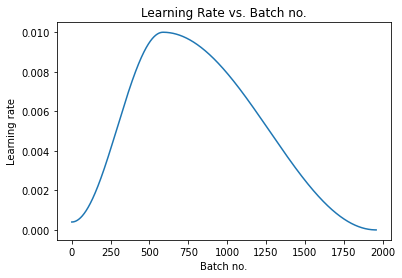

In [49]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

plot_lrs(history)

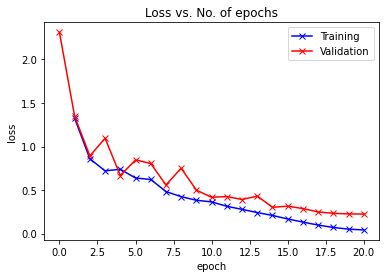

In [50]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

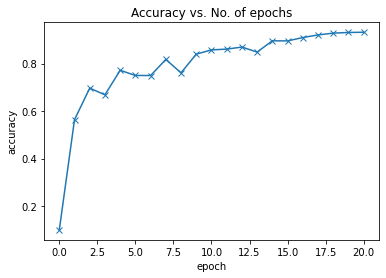

In [51]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(history)

- As a result, the accuracy of the model on the test set is **93.2%**.

References: 
- [Kaggle: CIFAR10 ResNet](https://www.kaggle.com/code/kmldas/cifar10-resnet-90-accuracy-less-than-5-min)
- [Classifying CIFAR10 images using ResNets](https://jovian.ml/aakashns/05b-cifar10-resnet)
- [ResNet Residual Neural network on CIFAR10](https://medium.com/analytics-vidhya/resnet-10f4ef1b9d4c)
- [Python Deep learning models with deployment](https://github.com/Arun-purakkatt/Deep_Learning_Pytorch)
- [ResNet on CIFAR10](https://juliusruseckas.github.io/ml/cifar10-resnet.html)
